# Analysis, 12-Month Sales Data

## Data & File Preparation

In [2]:
# import libraries

import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# Merge data into single file

df= pd.read_csv('./Sales_Data/Sales_April_2019.csv')

all_data= pd.DataFrame()

files= [file for file in os.listdir('./Sales_Data')]

for file in files:
    df= pd.read_csv('./Sales_Data/'+file)
    all_data= pd.concat([all_data, df])

all_data.to_csv('all_data.csv', index= False)

In [4]:
# Read in single file

all_data= pd.read_csv('all_data.csv')

In [5]:
# Remove entries with NaN values

nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data= all_data.dropna(how='all')

In [6]:
# Find and delete 'Or'

all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']

In [7]:
# Add month column

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [8]:
# Convert columns to correct type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [9]:
# Add sales column

all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']

## 
## What was the best month for sales? How much was earned that month?

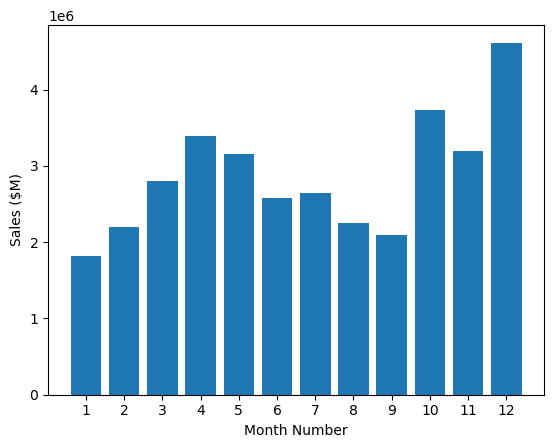

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [10]:
results= all_data.groupby('Month').sum()

months= range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales ($M)')
plt.xlabel('Month Number')
plt.show()

results.head(12)

### Month 12, December, had the greatest sales amount at 4.6M

## 
## What city had highest sales?

In [11]:
# Add 'City' column

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))

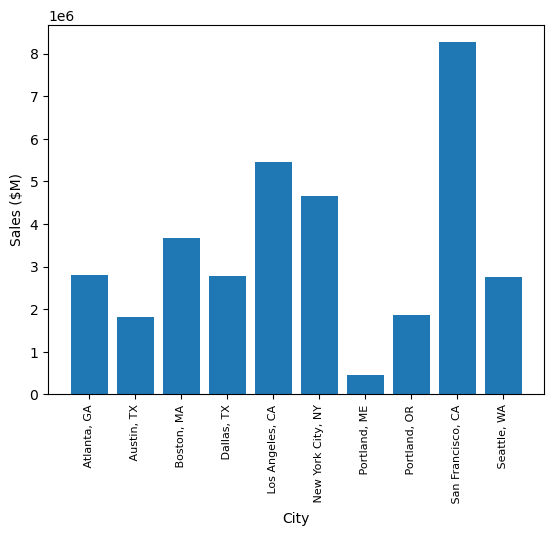

                    Quantity Ordered  Price Each   Month       Sales
City                                                                
 Atlanta, GA                   16602  2779908.20  104794  2795498.58
 Austin, TX                    11153  1809873.61   69829  1819581.75
 Boston, MA                    22528  3637409.77  141112  3661642.01
 Dallas, TX                    16730  2752627.82  104620  2767975.40
 Los Angeles, CA               33289  5421435.23  208325  5452570.80
 New York City, NY             27932  4635370.83  175741  4664317.43
 Portland, ME                   2750   447189.25   17144   449758.27
 Portland, OR                  11303  1860558.22   70621  1870732.34
 San Francisco, CA             50239  8211461.74  315520  8262203.91
 Seattle, WA                   16553  2733296.01  104941  2747755.48


In [12]:
results2= all_data.groupby('City').sum()
cities= [city for city, df in all_data.groupby('City')]

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation= 'vertical', size=8)
plt.ylabel('Sales ($M)')
plt.xlabel('City')
plt.show()

print(results2)

### San Francisco had the highest sales, at 8.2M

## 
## What time to display advertisments to maximize likelihood of purchase?

In [13]:
# Convert 'Order Date' to datetime format, add hour/minute columns

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour

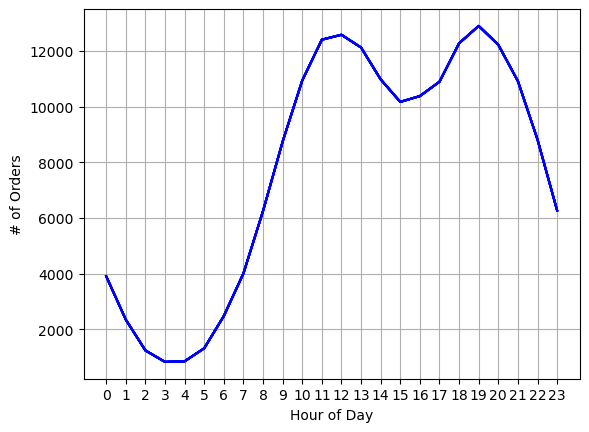

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [19]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(), color='b')
plt.xticks(hours)
plt.xlabel('Hour of Day')
plt.ylabel('# of Orders')
plt.grid()
plt.show()

all_data.groupby(['Hour']).count()

### Sales are greatest from the mid-day into the evening, peaking in the 12PM and 7PM hours with a slight lull in between. Advertisements could be targeted for the whole time period (roughly 10AM - 9PM) or target just the peaks (11AM - 1PM and 6PM - 8PM)

## 
## Which products are often sold together?

In [15]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\nort0\AppData\Local\Temp\ipykernel_8160\2077551221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [16]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Cell phones and their respective charging cables (Lightning for iPhone, USB-C for Google) were most often purchased together.

## 
## Which product sold the most? Why?

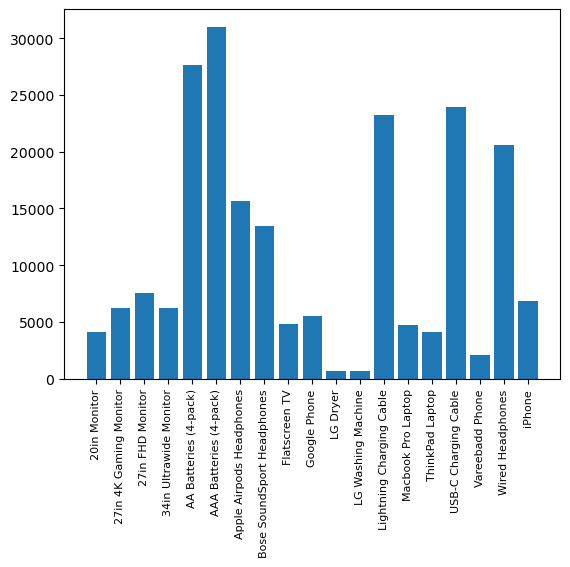

In [17]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.show()


### Batteries, both AAA and AA, sold the most. It is speculated that this is due to the low cost of these items as compared to those that sold very little such as washing machines, dryers, and laptop computers.

C:\Users\nort0\AppData\Local\Temp\ipykernel_8160\1346230720.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


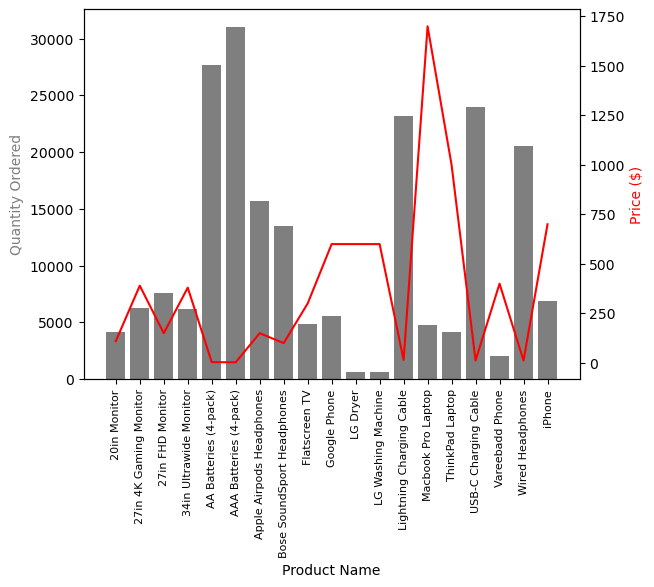

In [18]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='tab:gray')
ax2.plot(products, prices, 'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='tab:gray')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

### The hypothesis that batteries are high sellers due to their low cost holds up when we overlay product price with the sales quantities. We see that there appears to be an inverse relationship between product price and sales quantities.